# Start of Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_USA/merged_df.csv')
merged_df.head()

,GDP,Year,M1,GDP Change,Oil_Price,CPI
0,542.382,1960,140.3,3.97351,1.63,1.457976
1,562.210,1961,143.1,3.65563,1.57,1.070724
2,603.922,1962,146.5,7.41925,1.52,1.198773
3,637.452,1963,151.0,5.55205,1.50,1.239669
4,684.462,1964,156.8,7.37468,1.45,1.278912


In [ ]:
y = merged_df['GDP']
X = merged_df.drop(columns=['GDP', 'Year'])

# Trainieren des linearen Regressionsmodells
model = LinearRegression()
model.fit(X, y)

# Generiere Vorhersagen
X_new = np.array([[0], [2]])  # Beispielsweise
y_pred = model.predict(X)

# Visualisierung der Daten und der Regressionsgeraden
plt.scatter(y, y_pred)
plt.xlabel("GDP (wirkliche Werte)")
plt.ylabel("GDP (vorhergesagte Werte)")
plt.title("Lineare Regression")
plt.show()

In [ ]:
# Bestimmen der Metriken
r_squared = model.score(X, y)
intercept = model.intercept_
slope = model.coef_

print("R² Score:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Vorhersagen basierend auf den trainierten Modell
y_pred = model.predict(X)

# Berechnen der Metriken
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

## Statsmodel package

In [ ]:
import statsmodels.api as sm
y = merged_df['GDP']
X = merged_df.drop(columns=['GDP', 'Year', 'GDP Change'])
X = sm.add_constant(X)

# Durchführen der linearen Regression
model = sm.OLS(y, X)
results = model.fit()

# Ausgabe der Regressionsergebnisse
print(results.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Berechnung der VIFs
vif_data = X.copy()  # Kopie der unabhängigen Variablen
vif_data = vif_data.drop(columns=['const'])  # Entfernen der Konstante
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Ausgabe der VIFs
print(vif)


In [9]:
merged_df.columns
X = merged_df[['M1', 'GDP Change', 'Oil_Price', 'CPI']]
y = merged_df['GDP']
y.shape, X.shape

((61,), (61, 4))

Mean Squared Error (MSE): 23911802.213172335
R-squared (R²): 0.6153858082516377
Mean Absolute Error (MAE): 3184.9164960434596


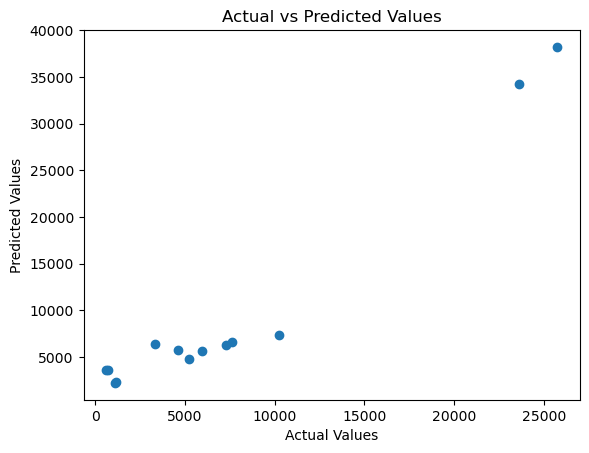

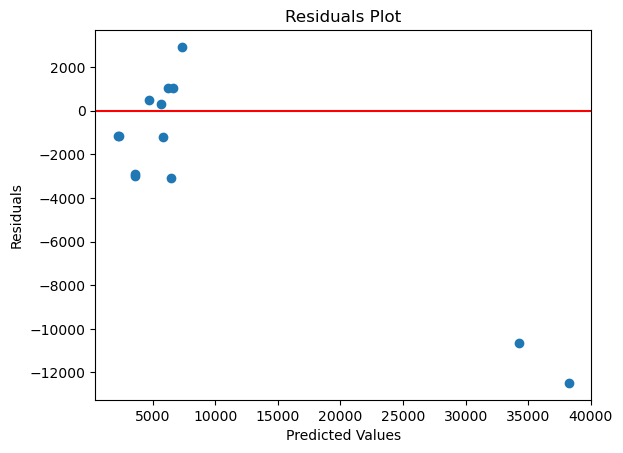

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Annahme: X enthält die Features (GDP, M1, CPI, Oil Price) und y enthält die Zielvariable (GDP)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Trainieren des Regressionsmodells
model = Ridge()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten machen
y_pred = model.predict(X_test)

# Bewertung der Leistung des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)

# Visualisierung der Vorhersagen gegen die tatsächlichen Werte
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Residuenplot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Annahme: X enthält die Features (GDP, M1, CPI, Oil Price) und y enthält die Zielvariable (GDP)
model = LinearRegression()

# Durchführung von 5-Fold Kreuzvalidierung
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Da wir den MSE zurückbekommen haben, negieren wir ihn, um den positiven MSE-Wert zu erhalten
cv_scores = -cv_scores

# Durchschnittlicher MSE über alle Folds
average_mse = cv_scores.mean()

print("Cross-Validated Mean Squared Error (MSE):", average_mse)


Cross-Validated Mean Squared Error (MSE): 703558906.5008625
